# readDiag

O pacote `readDiag` foi concebido para ser uma ferramenta que possibilita o fácil acesso aos arquivos diagnósticos gerados pelo [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). O pacote é composto principalmente por 2 classes, a primeira para ler os dados (`read_diag`) e outra para fazer diferentes tipos de figuras com dados selecionados (`plot_diag`).

## A Classe `read_diag`

A classe read_diag é composta por 5 funções:

1. `__init__(self, diagFile, diagFileAnl=None, isisList=None, zlevs=None)`: sendo `diagFile` o arquivo de diagnóstico do primeiro outer loop com informação do OmF e `diagFileAnl` do último outer loop com informação do OmA. Note que não é necessário informar os dois arquivos, o `diagFileAnl` é opcional. Neste caso, a informação lida (Omf ou OmA) dependerá do outer loop (arquivo diagnóstico) fornecido;
2. `overview(self)`: esta função cria e retorna um dicionário com as informações existentes no arquivo;
3. `pfileinfo(self)`: esta função imprime de forma elegante uma lista com as informações existentes no arquivo;
4. `close(self)`: esta função fecha o último arquivo aberto;
5. `tocsv(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", Level=None, Lay=None, SingleL=None)`: esta função gera um arquivo CSV dos parâmetros OmF e OmA com as seguintes informações: data, média, desvio-padrão e total de dados para a variável e tipo escolhidos.
    
Os dados de entrada da função e funcionalidades são idênticas àquelas da função `time_series` que é apresentada na próxima seção na classe `plot_diag` (item 7 - ver também detalhes das funcionalidades [aqui](#time_series)). O que distingue as duas funções é que esta escreve um arquivo CSV e a outra gera figuras de séries temporais.

## A Classe `plot_diag`
    
A classe plot_diag é composta por 7 funções:

1. `plot(self, varName, varType, param, mask=None, **kwargs)`: a função `plot` gera uma figura para a variável `varName` (ex: `uv`), `varType` (ex: `220` (dropssonda)) e `param`, que pode ser várias opções como: `param="obs"` para o valor da observação, `param="omf"` para observação menos background ou `param="oma"` para observação menos análise. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=220`, `param="obs"` e mask `iuse==1"`;

<img src=notefigs/uv_obs_plot.png style="width: 800px;">
<br>
    
2. `ptmap(self, varName, varType=None, mask=None, **kwargs)`: a função `ptmap` gera uma figura com a localização de todas as observações definidas por `varName` (ex: `uv`) e `varType` (pode ser um único tipo ou uma lista, ex: `[200]` ou `[220,221,257]`. Se `varType` não for informado, então todos os tipos serão incluídos na figura. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=[254,242,221,220,257,258,281,280]` e `mask=None`; 

<img src=notefigs/uv_254_242_221_220_257_258_281_280_ptmap.png style="width: 800px;">
<br>

3. `pvmap(self, varName=None, mask=None, **kwargs)`: a função `pvmap` é similar à função `ptmap`, com a diferença de não especificar o tipo (`varType`), podendo então escolher uma lista de variáveis, ex: `["uv","ps","t"]`. Abaixo há um exemplo executado para `varName=['uv','ps','t']`, e `mask=None`; 

<img src=notefigs/uv_ps_t_pvmap.png style="width: 800px;">
<br>

4. `pcount(self,varName,**kwargs)`: a função `pcount` gera um histograma da quantidade de dados para uma determinada variável `varName` (ex: `uv`) e todos os tipos disponíveis (`varType`);

<img src=notefigs/uv_pcount.png style="width: 800px;">
<br>

5. `kxcount(self,**kwargs)`: a função `kxcount` é similar à `pcount`, porém não especifica a variável (`varName`). Esta função gera um histograma com o total de dados (todas as variáveis somadas) para todos os tipos disponíveis (`varType`);

<img src=notefigs/kxcount.png style="width: 800px;">
<br>

6. `vcount(self,**kwargs)`: a função `vcount` gera um histograma com a quantidade total de dados para cada variável (`ps`, `t`, `q`, `uv`);

<img src=notefigs/vcount.png style="width: 800px;">
<br>

7. `time_series(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, Level=None, Lay=None, SingleL=None, Clean=None)`: a função `time_series` pode gerar 6 tipos distintos de figuras, dependendo da configuração especificada na sua chamada. A característica comum entre os 6 tipos é a variação no tempo, enquanto que a diferença entre os 6 tipos é a forma de tratar os níveis verticais. Basicamente estas formas são distribuídas entre variar na vertical (diferentes valores para diferentes níveis/camadas) e fixo na vertical (nível específico, média na camada ou toda a atmosfera). 

A seguir são apresentados os parâmetros de entrada na função e cada uma das opções de figuras será explicada em mais detalhes.
    
| Parâmetro       | Exemplo                                  | Descrição
| :---            | :---:                                    | :---
| `self`          | `['/home/user/diag_conv_01.2019121000']` | Lista com todos os caminhos completos (`caminho/nome_do_arquivo`) de cada tempo da série temporal.             
| `varName`       | `uv`                                     | Nome da variável   
| `varType`       | `220`                                    | Tipo da variável
| `dateIni`       | `2019121000`                             | Data inicial da série temporal
| `dateFin`       | `2019121118`                             | Data final da série temporal
| `nHour`         | `6`                                      | Intervalo de tempo em horas entre cada arquivo na lista `self`
| `vminOMA`       | `-2.0`                                   | Valor mínimo da escala y (ordenada) para OmF e OmA
| `vmaxOMA`       | `2.0`                                    | Valor máximo da escala y (ordenada) para OmF e OmA
| `vminSTD`       | `0.0`                                    | Valor mínimo da escala y (ordenada) para o desvio-padrão
| `vmaxSTD`       | `14.0`                                   | Valor máximo da escala y (ordenada) para o desvio-padrão
| `Level`         | `Zlevs`                                  | Valor do nível a ser feita a série temporal, opções: valor numérico referente ao nível, ex.: 1000 p/ 1000 hPa; `Zlevs` para plotar por camadas (em torno dos níveis padrão); `None` para plotar de todos os níveis.
| `Lay`           | 25                                       | Metade do tamanho da camada (se `Level="Zlevs"`) em hPa se optar por amostragem em camadas. Se `Lay=None`, `Lay` será calculada internamente para preencher toda a atmosfera contendo os níveis padrão.
| `SingleL`       | `All`                                    | Quando `Level` for fixo, ex: 1000 hPa, será considerado exatamente esse nível (usando a opção `SingleL=None`) ou em todos os níveis como uma única camada (usando `SingleL="All"`) ou em uma camada definida em torno do valor de `Level` variando entre `Level-Lay` e `Level+Lay`. Se `Lay` não for informado, será usado um valor padrão de 50 hPa.
| `Clean`         | `True` ou `False`                        | Se `True`, após gerar e salvar a figura, a janela da figura é reiniciada (`plt.clf()`) ou fechada (`plt.close()`), se `False`, este procedimento é eliminado e a figura continua disponível para visualização com `plt.show()`.

Todas as figuras geradas com a opção `Level` igual a `None` ou `Zlevs` conterá no nome o termo `all_levels`, caso contrário será `level` ou `layer`, dependendo da opção `SingleL`.

No decorrer deste notebook são mostrados exemplos com recortes de código para exemplificar o uso das funções acima elencadas.

## Utilização da classe `read_diag`

### Bibliotecas necessárias

Para iniciar a utilização do `readDiag`, carregue primeiro as bibliotecas necessárias para a sua utilização:

* `gsidiag`: é a biblioteca que contém as classes `read_diag` e `plot_diag`;
* `pandas`: é a biblioteca que fornece as estruturas de dados tabulados utilizadas pelo `readDiag`;
* `matplotlib`: é a biblioteca a partir da qual são confeccionadas as figuras;
* `datetime`: é a biblioteca utilizada para manipular datas.

A instrução `%matplotlib inline` é um comando mágico do Jupyter e apenas ajusta o ambiente para que não seja necessário utilizar o comando `plt.show()` sempre que figuras forem mostradas dentro do notebook. Se você estiver utilizando o `readDiag` dentro de um script Python, esta diretiva pode ser suprimida e o comando `plt.show()` deve ser utilizado, a depender da situação.

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Variáveis principais

Na tabela a seguir, estão relacionadas os valores padrão das variáveis utilizadas ao longo deste tutorial. Observe que as variáveis possuem diferentes tipos e que algumas podem ser declaradas como `None`.

| Variáveis |     | Valores          | Tipo              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `uv`             | string            |  
|`varType`  | =   | `220`            | integer           |        
|`dateIni`  | =   | `2019121000`     | string            |
|`dateFin`  | =   | `2019121118`     | string            |
|`nHour`    | =   | `6`              | string            | 
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`Level`    | =   | `1000`           | integer ou `None` |
|`Lay`      | =   | `15`             | integer ou `None` |
|`SingleL`  | =   | `OneL`           | string            |
                          
Dessa forma, na célula a seguir são ajustadas as variáveis seguindo os valores da tabela acima. Além disso, são ajustados também os valores das datas para compor o caminho e os nomes dos arquivos de diagnóstico do GSI:

In [2]:
# Para uso na Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso na Itapemirim (Colorado, Ilopolis e outras máquinas virtuais)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso em máquina local (neste caso, o diretório remoto deverá ser montado localmente com o comando sshfs)
# Exemplo: 
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# ou
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
DIRdiag = '/home/patrick/readDiag/data'

varName = 'uv'
varType = 220
dateIni = '2019121000' 
dateFin = '2019121118' 
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2019121000', '2019121006', '2019121012', '2019121018', '2019121100', '2019121106', '2019121112', '2019121118']


Gerando as variáveis `path` e `pathc` onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop:

In [3]:
paths, pathsc = [], []

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterL + '.' + dt) for dt in dates]

OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/extra2/EGEON_EXP18_GSI_dataout/2019121000/diag_conv_01.2019121000', '/extra2/EGEON_EXP18_GSI_dataout/2019121006/diag_conv_01.2019121006', '/extra2/EGEON_EXP18_GSI_dataout/2019121012/diag_conv_01.2019121012', '/extra2/EGEON_EXP18_GSI_dataout/2019121018/diag_conv_01.2019121018', '/extra2/EGEON_EXP18_GSI_dataout/2019121100/diag_conv_01.2019121100', '/extra2/EGEON_EXP18_GSI_dataout/2019121106/diag_conv_01.2019121106', '/extra2/EGEON_EXP18_GSI_dataout/2019121112/diag_conv_01.2019121112', '/extra2/EGEON_EXP18_GSI_dataout/2019121118/diag_conv_01.2019121118']

['/extra2/EGEON_EXP18_GSI_dataout/2019121000/diag_conv_03.2019121000', '/extra2/EGEON_EXP18_GSI_dataout/2019121006/diag_conv_03.2019121006', '/extra2/EGEON_EXP18_GSI_dataout/2019121012/diag_conv_03.2019121012', '/extra2/EGEON_EXP18_GSI_dataout/2019121018/diag_conv_03.2019121018', '/extra2/EGEON_EXP18_GSI_dataout/2019121100/diag_conv_03.2019121100', '/extra2/EGEON_EXP18_GSI_dataout/2019121106/diag_conv_03.2019121106', '/extra2/EGEON_EX

### Leitura dos arquivos de diagnósticos

**Nota:** a leitura dos arquivos de diagnóstico seguindo os valores ajustados para os parâmetros acima, requer pelo menos 8GB de memória RAM. Caso seja necessário, ajuste os parâmetros para considerar um intervalo menor.

Lendo os arquivos diagnósticos com a função `read_diag()` do pacote `readDiag`. No trecho de código a seguir, observe que a função `read_diag()` é utilizada dentro de um loop que varia sobre todos os arquivos das listas `paths` e `pathsc` definidas no passo anterior. No final do loop, é gerada a lista `gdf_list` que conterá todos os arquivos lidos pelo `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Pronto!')    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 2 minutos e 40 segundos.

Reading /extra2/EGEON_EXP18_GSI_dataout/2019121000/diag_conv_01.2019121000
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121006/diag_conv_01.2019121006
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121012/diag_conv_01.2019121012
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121018/diag_conv_01.2019121018
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121100/diag_conv_01.2019121100
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121106/diag_conv_01.2019121106
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121112/diag_conv_01.2019121112
 
>>> GSI DIAG <<<
 
Reading /extra2/EGEON_EXP18_GSI_dataout/2019121118/diag_conv_01.2019121118
 
>>> GSI DIAG <<<
 
Pronto!


A variável `gdf_list` é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o índice fixo, por exemplo: `gdf_list[0]`:

In [5]:
gdf_list

Fazendo `tidx = 0`, obtemos o primeiro objeto da lista `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter uma lista das observações e seus respectivos tipos (`kx`) que estão contidos dentro do arquivo:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : ps
              └── kx => 181  120  187  180  183  

Variable Name : t
              └── kx => 181  120  187  180  183  130  126  

Variable Name : q
              └── kx => 181  120  187  180  183  

Variable Name : uv
              └── kx => 257  259  258  244  281  253  254  220  287  280  221  284  230  243  210  252  242  250  229  224  282  245  246  247  240  



Além do método `pfileinfo()`, outros métodos e funções também podem ser utilizados para acessar as informações sobre os arquivos abertos. Para obter uma lista dos métodos e funções disponíveis, digite `gdf_list[tidx].` e pressione a tecla `<TAB>` duas vezes no teclado:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs       
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames    
gdf_list[tidx].obs
```

Os métodos e funções embutidas possuem documentação, as quais podem ser acessadas da seguinte forma:

```python
print(object.function_name.__doc__)
```

ou

```python
help(object.function_name)
```

Por exemplo:

In [8]:
print(gdf_list[tidx].pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


ou ainda:

In [9]:
help(gdf_list[tidx].pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



Para obter um dicionário com todas as informações sobre as variáveis e tipos contidos no arquivo, utilize o método `obsInfo`:

In [10]:
gdf_list[tidx].obsInfo

{'ps':                   lat         lon    elev         prs     hgt  press   time  \
 kx  points                                                                    
 181 0      -72.000000    2.520000  1290.0  852.099976  1290.0  800.0    0.0   
     1      -70.760002   11.830000   123.0  987.700012   123.0  900.0    0.0   
     2      -72.000000    2.520000  1290.0  852.400024  1290.0  800.0   60.0   
     3      -72.000000    2.520000  1290.0  852.099976  1290.0  800.0  120.0   
     4      -72.000000    2.520000  1290.0  852.400024  1290.0  800.0  -60.0   
 ...               ...         ...     ...         ...     ...    ...    ...   
 183 3600    65.680000  341.929993    27.0  982.299988    27.0  900.0 -180.0   
     3601    63.779999  341.929993    38.0  977.599976    38.0  900.0 -180.0   
     3602    66.449997  344.049988    10.0  989.299988    10.0  900.0 -180.0   
     3603    63.779999  341.929993    38.0  972.599976    38.0  900.0    0.0   
     3604    66.449997  344.049988

Para acessar uma variável específica (ex: `uv`), faça:

In [11]:
print('Variável: ', varName)

gdf_list[tidx].obsInfo[varName]

Variável:  uv


lat         lon     elev    prs   hgt  press   time  idqc  \
kx  points                                                                    
257 0      -78.699997   14.860000  61068.0  487.0  30.0  400.0  -66.0   2.0   
    1      -78.769997   16.080000  60056.0  487.0  54.0  400.0  -66.0   2.0   
    2      -78.870003   16.120001  72079.0  500.0  37.0  500.0  -66.0   2.0   
    3      -80.500000   12.490000  80084.0  562.0  47.0  500.0  -66.0   2.0   
    4      -80.290001   13.620000  64059.0  512.0  56.0  500.0  -66.0   2.0   
...               ...         ...      ...    ...   ...    ...    ...   ...   
240 7107    13.980000  245.070007  74084.0  925.0  47.0  900.0  171.0   2.0   
    7108    13.690000  241.919998  79080.0  887.0  64.0  800.0  171.0   2.0   
    7109    13.710000  244.139999  57051.0  887.0  70.0  800.0  171.0   2.0   
    7110    13.520000  247.809998  56054.0  906.0  65.0  900.0  171.0   2.0   
    7111    13.510000  250.479996  80087.0  906.0  60.0  900.0  171.0   2.0   

            iuse  iusev  ...       inp_err       adj_err        inverr  \
kx  points               ...                                             
257 0       -1.0    0.0  ...  2.307337e-01  2.307337e-01  2.938736e-39   
    1       -1.0    0.0  ...  2.307337e-01  2.307337e-01  2.938736e-39   
    2       -1.0    0.0  ...  2.439024e-01  2.439024e-01  2.938736e-39   
    3       -1.0    0.0  ...  2.500000e-01  2.500000e-01  2.938736e-39   
    4       -1.0    0.0  ...  2.453386e-01  2.453386e-01  2.938736e-39   
...          ...    ...  ...           ...           ...           ...   
240 7107    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7108    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7109    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7110    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7111    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   

                     oer       obs       omf       oma           imp  \
kx  points                                                             
257 0                NaN -2.250000 -5.155063 -5.807309           NaN   
    1                NaN  0.934964 -2.355014 -2.984500           NaN   
    2                NaN  0.988129 -2.418580 -3.046497           NaN   
    3                NaN  3.983431  0.595628  0.257419           NaN   
    4                NaN  3.680218  0.498253  0.008589           NaN   
...                  ...       ...       ...       ...           ...   
240 7107    1.000000e+09 -7.203239 -0.806275 -0.955513  2.629265e-10   
    7108    1.000000e+09 -7.751757 -1.638531 -1.589939 -1.568761e-10   
    7109    1.000000e+09 -7.044833 -4.839164 -4.851346  1.180420e-10   
    7110    1.000000e+09 -7.018799 -2.621243 -2.872725  1.381637e-09   
    7111    1.000000e+09 -4.978588 -1.019387 -1.283688  6.087035e-10   

                     dfs                     geometry  
kx  points                                             
257 0                NaN   POINT (14.86000 -78.70000)  
    1                NaN   POINT (16.08000 -78.77000)  
    2                NaN   POINT (16.12000 -78.87000)  
    3                NaN   POINT (12.49001 -80.50000)  
    4                NaN   POINT (13.62000 -80.29000)  
...                  ...                          ...  
240 7107    1.203272e-10  POINT (-114.92999 13.98000)  
    7108   -7.961867e-11  POINT (-118.08002 13.69000)  
    7109    5.894722e-11  POINT (-115.85999 13.71000)  
    7110    6.591968e-10  POINT (-112.19000 13.52000)  
    7111    2.694244e-10  POINT (-109.52002 13.51000)  

[435598 rows x 21 columns]

Para acessar variável e tipo específicos (ex: `uv` do tipo `220`), faça:

In [12]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType]

Variável:  uv  e Tipo:  220


lat         lon  elev          prs           hgt   press  \
points                                                                   
0      -33.980000   18.600000  52.0  1004.000000  1.000000e+11  1000.0   
1      -33.979839   18.599819  52.0  1000.000000  1.000000e+11  1000.0   
2      -33.978512   18.598080  52.0   975.700012  3.000000e+02   900.0   
3      -33.977551   18.596769  52.0   942.400024  6.000000e+02   900.0   
4      -33.977921   18.596710  52.0   925.000000  1.000000e+11   900.0   
...           ...         ...   ...          ...           ...     ...   
37461   75.934608  344.023560  14.0     8.200000  1.000000e+11     0.0   
37462   75.892578  344.104126  14.0     7.400000  1.000000e+11     0.0   
37463   75.865311  344.162476  14.0     6.900000  1.000000e+11     0.0   
37464   75.810112  344.267883  14.0     6.100000  1.000000e+11     0.0   
37465   75.793587  344.295898  14.0     5.900000  1.000000e+11     0.0   

             time  idqc  iuse  iusev  ...   inp_err   adj_err        inverr  \
points                                ...                                     
0      -45.000000   2.0   1.0    0.0  ...  0.714286  0.553566  1.418077e-01   
1      -44.880001   2.0   1.0    0.0  ...  0.714286  0.553565  2.351083e-01   
2      -44.173199   2.0   1.0    0.0  ...  0.714286  0.714286  7.142857e-01   
3      -43.173000   2.0  -1.0    0.0  ...  0.666667  0.652960  2.938736e-39   
4      -42.640198   2.0  -1.0    0.0  ...  0.666667  0.619352  2.938736e-39   
...           ...   ...   ...    ...  ...       ...       ...           ...   
37461   48.249001   2.0   1.0    0.0  ...  0.476190  0.396825  3.968254e-01   
37462   50.231998   2.0   1.0    0.0  ...  0.476190  0.396825  3.968254e-01   
37463   51.583801   2.0   1.0    0.0  ...  0.476190  0.396825  3.968254e-01   
37464   53.967602   2.0   1.0    0.0  ...  0.476190  0.346399  3.463990e-01   
37465   54.613201   2.0   1.0    0.0  ...  0.476190  0.348412  3.484119e-01   

             oer   obs        omf       oma         imp        dfs  \
points                                                               
0       7.787335  -1.0   5.123084  2.253895   -2.717996  -1.887564   
1       4.988861  -3.5   2.621643 -0.247218   -1.365421  -1.507585   
2       1.400000  -4.0   9.577692  3.444868  -57.046478 -41.955929   
3       1.531486   0.0  16.411770  9.015676 -122.798218 -79.258301   
4       1.614591  -0.4  13.814748  6.904759  -88.673553 -59.123161   
...          ...   ...        ...       ...         ...        ...   
37461   2.520000  15.0  -3.926741 -4.877170    3.320431   1.480986   
37462   2.520000  21.6   3.278691  2.275991   -2.210190  -1.304581   
37463   2.520000  17.4  -0.492477 -1.526073    0.827923   0.201993   
37464   2.886844  22.6   5.281235  3.752217   -4.784572  -2.797208   
37465   2.870166  16.9  -0.252810 -1.935140    1.282453   0.148183   

                          geometry  
points                              
0       POINT (18.60001 -33.98000)  
1       POINT (18.59982 -33.97984)  
2       POINT (18.59808 -33.97851)  
3       POINT (18.59677 -33.97755)  
4       POINT (18.59671 -33.97792)  
...                            ...  
37461   POINT (-15.97644 75.93461)  
37462   POINT (-15.89587 75.89258)  
37463   POINT (-15.83752 75.86531)  
37464   POINT (-15.73212 75.81011)  
37465   POINT (-15.70410 75.79359)  

[37466 rows x 21 columns]

O parâmetro `varType` pode ser também uma lista, ex: `varType=[220,221]`:

In [13]:
varTypes = [220,221]

print('Variável: ', varName, ' e Tipos: ', varTypes)

gdf_list[tidx].obsInfo[varName].loc[varTypes]

Variável:  uv  e Tipos:  [220, 221]


lat         lon   elev          prs           hgt   press  \
kx  points                                                                    
220 0      -33.980000   18.600000   52.0  1004.000000  1.000000e+11  1000.0   
    1      -33.979839   18.599819   52.0  1000.000000  1.000000e+11  1000.0   
    2      -33.978512   18.598080   52.0   975.700012  3.000000e+02   900.0   
    3      -33.977551   18.596769   52.0   942.400024  6.000000e+02   900.0   
    4      -33.977921   18.596710   52.0   925.000000  1.000000e+11   900.0   
...               ...         ...    ...          ...           ...     ...   
221 639      7.378550  352.432678  336.0   616.083801  4.200000e+03   600.0   
    640      7.382580  352.415344  336.0   551.021729  5.100000e+03   500.0   
    641      7.385930  352.406006  336.0   500.000000  1.000000e+11   500.0   
    642      7.386930  352.403564  336.0   510.839386  5.700000e+03   500.0   
    643      7.392140  352.394043  336.0   473.089569  6.300000e+03   400.0   

                 time  idqc  iuse  iusev  ...   inp_err   adj_err  \
kx  points                                ...                       
220 0      -45.000000   2.0   1.0    0.0  ...  0.714286  0.553566   
    1      -44.880001   2.0   1.0    0.0  ...  0.714286  0.553565   
    2      -44.173199   2.0   1.0    0.0  ...  0.714286  0.714286   
    3      -43.173000   2.0  -1.0    0.0  ...  0.666667  0.652960   
    4      -42.640198   2.0  -1.0    0.0  ...  0.666667  0.619352   
...               ...   ...   ...    ...  ...       ...       ...   
221 639    -32.119801   2.0   1.0    0.0  ...  0.526316  0.526316   
    640    -29.119799   2.0   1.0    0.0  ...  0.500000  0.500000   
    641    -27.538200   2.0   1.0    0.0  ...  0.476190  0.412661   
    642    -27.119999   2.0   1.0    0.0  ...  0.476190  0.412666   
    643    -25.120199   2.0   1.0    0.0  ...  0.434783  0.434783   

                  inverr       oer   obs        omf       oma         imp  \
kx  points                                                                  
220 0       1.418077e-01  7.787335  -1.0   5.123084  2.253895   -2.717996   
    1       2.351083e-01  4.988861  -3.5   2.621643 -0.247218   -1.365421   
    2       7.142857e-01  1.400000  -4.0   9.577692  3.444868  -57.046478   
    3       2.938736e-39  1.531486   0.0  16.411770  9.015676 -122.798218   
    4       2.938736e-39  1.614591  -0.4  13.814748  6.904759  -88.673553   
...                  ...       ...   ...        ...       ...         ...   
221 639     5.263158e-01  1.900000 -10.0  -1.387435  0.471839   -0.895970   
    640     5.000000e-01  2.000000 -11.3  -0.546905  1.363278    0.779710   
    641     4.126614e-01  2.423294 -10.3  -3.802699 -2.725824   -2.901176   
    642     4.126657e-01  2.423269 -10.9  -3.664526 -2.379657   -3.204753   
    643     4.347826e-01  2.300000  -6.5   2.720051  3.510464    2.141166   

                  dfs                    geometry  
kx  points                                         
220 0       -1.887564  POINT (18.60001 -33.98000)  
    1       -1.507585  POINT (18.59982 -33.97984)  
    2      -41.955929  POINT (18.59808 -33.97851)  
    3      -79.258301  POINT (18.59677 -33.97755)  
    4      -59.123161  POINT (18.59671 -33.97792)  
...               ...                         ...  
221 639     -1.357695    POINT (-7.56732 7.37855)  
    640     -0.522345    POINT (-7.58466 7.38258)  
    641     -1.689862    POINT (-7.59399 7.38593)  
    642     -1.943009    POINT (-7.59644 7.38693)  
    643      0.934767    POINT (-7.60596 7.39214)  

[38110 rows x 21 columns]

Para acessar o valor da observação, utilize o método `obs`:

In [14]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType].obs

Variável:  uv  e Tipo:  220


points
0        -1.0
1        -3.5
2        -4.0
3         0.0
4        -0.4
         ... 
37461    15.0
37462    21.6
37463    17.4
37464    22.6
37465    16.9
Name: obs, Length: 37466, dtype: float32

## Utilização da classe `plot_diag`

### Distribuição espacial

A utilização das funções da classe `plot_diag` é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

Gerando uma figura com os valores das observações (`param='obs'`) para a variável e tipo selecionados:

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

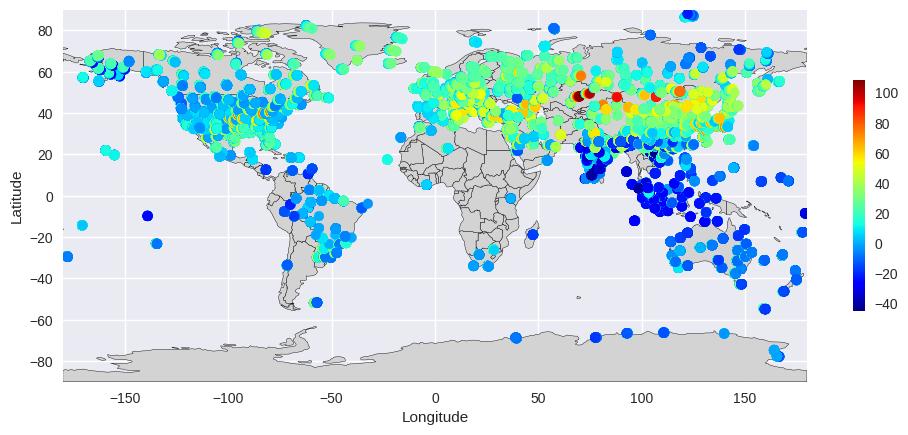

In [15]:
param = 'obs'

gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')

Para salvar a figura, defina o seu nome (`figname`) e execute os comandos a seguir:

In [16]:
figname = varName + '_' + param + '_' + 'plot.png'

plt.tight_layout()
plt.savefig(figname)

<Figure size 800x550 with 0 Axes>

Gerando a mesma figura, mas considerando vários tipos diferentes (`kx`) da observação selecionada:

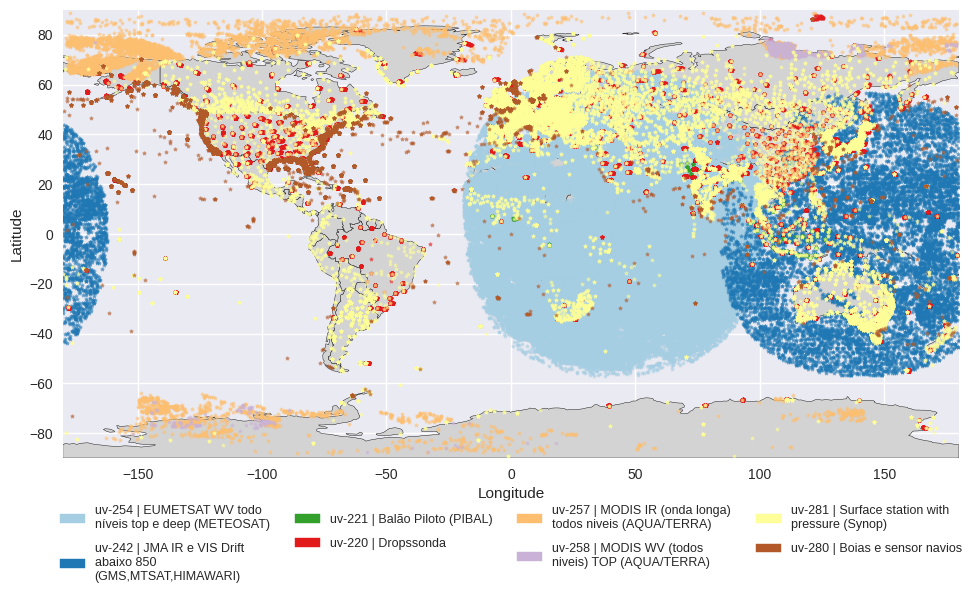

In [17]:
varTypes = [254,242,221,220,257,258,281,280]
idschar = '_'.join([str(item) for item in varTypes])

gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes)

figname = varName + '_' + idschar + '_' + 'ptmap.png'

plt.tight_layout()
plt.savefig(figname)

Gerando uma figura com diferentes variáveis, considerando a máscara `iuse==1`:

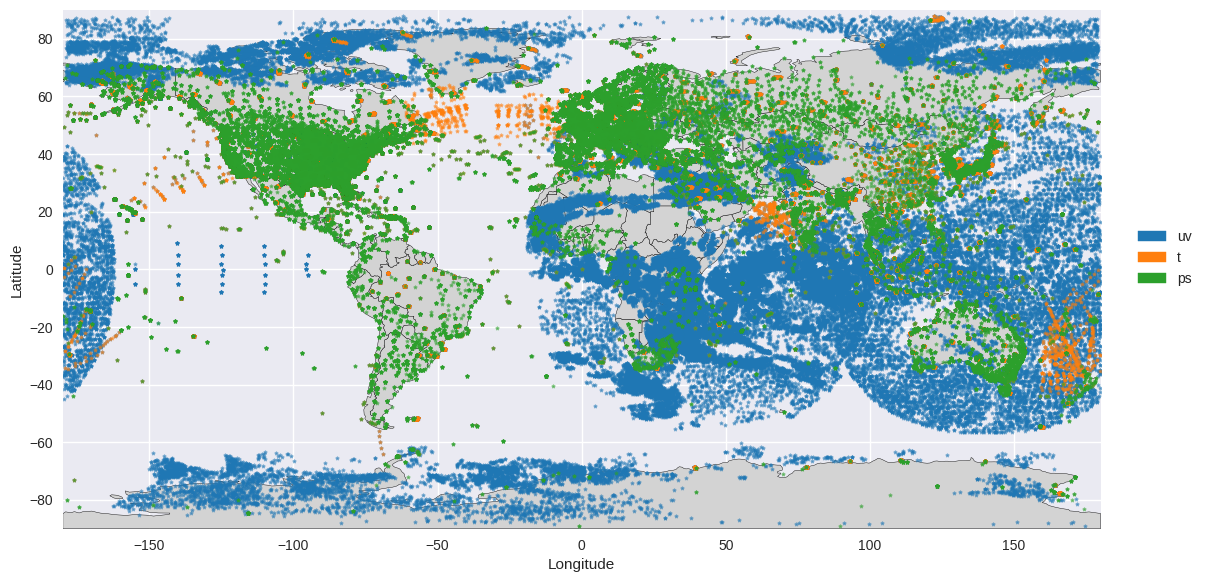

In [18]:
varNames = ['uv','ps','t']
idschar = '_'.join([str(item) for item in varNames])

gd.plot_diag.pvmap(gdf_list[tidx], varName=varNames, mask='iuse==1')

figname = idschar + '_pvmap.png'

plt.tight_layout()
plt.savefig(figname)

### Histograma

Utilize a função `pcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para uma determinada variável:

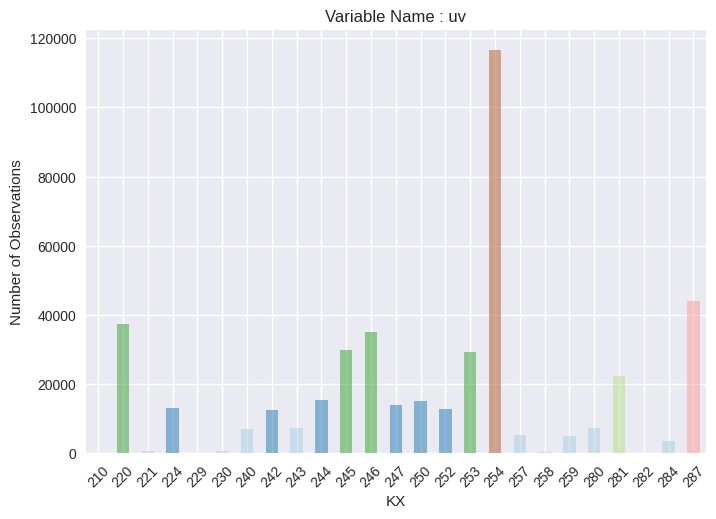

In [19]:
gd.plot_diag.pcount(gdf_list[tidx], varName)

Utilize a função `vcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para todos os tipos de variáveis:

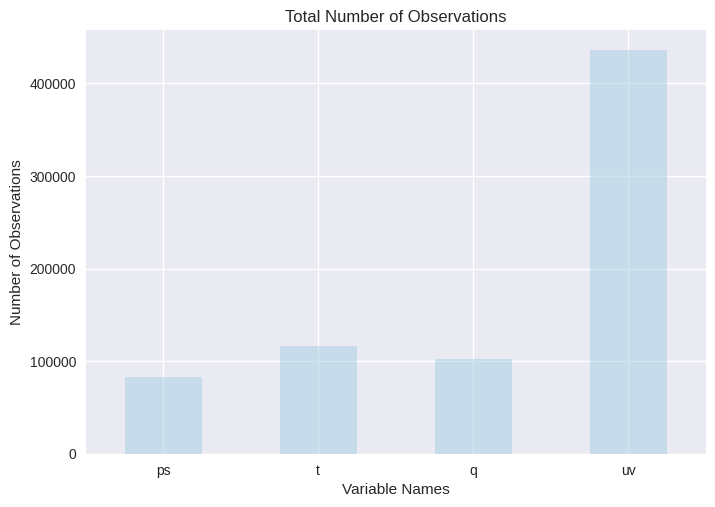

In [20]:
gd.plot_diag.vcount(gdf_list[tidx])

De forma semelhante, utilize a função `kxcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações por tipo:

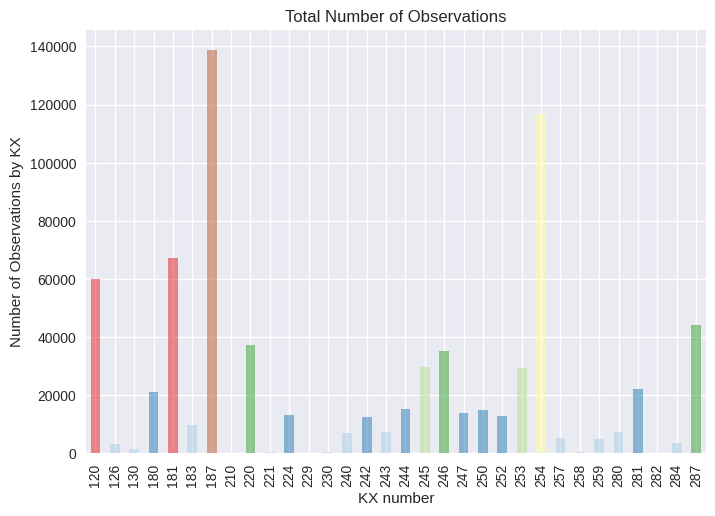

In [21]:
gd.plot_diag.kxcount(gdf_list[tidx])

### Série temporal

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função `time_series()`, incluída na classe `plot_diag`. Inicialmente é gerada uma figura com os parâmetros já fixados nesta seção. Em seguida são apresentadas figuras alterando os parâmetros `Level`, `Lay` e `SingleL`.

Plotando uma série temporal do OmA e OmF:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00  - Level:  1000
 Preparing data for: 2019-12-10:06  - Level:  1000
 Preparing data for: 2019-12-10:12  - Level:  1000
 Preparing data for: 2019-12-10:18  - Level:  1000
 Preparing data for: 2019-12-11:00  - Level:  1000
 Preparing data for: 2019-12-11:06  - Level:  1000
 Preparing data for: 2019-12-11:12  - Level:  1000
 Preparing data for: 2019-12-11:18  - Level:  1000


 Calculating for 2019-12-10:00
 Calculating for 2019-12-10:06
 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

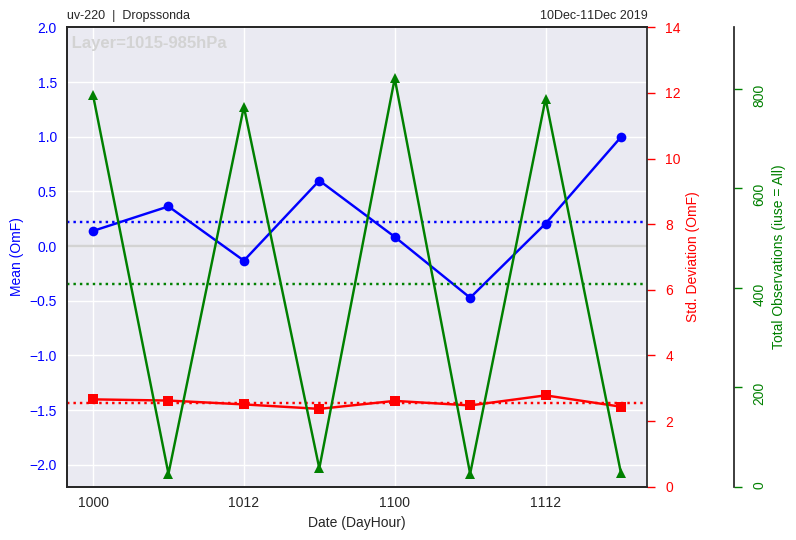

<Figure size 600x400 with 0 Axes>

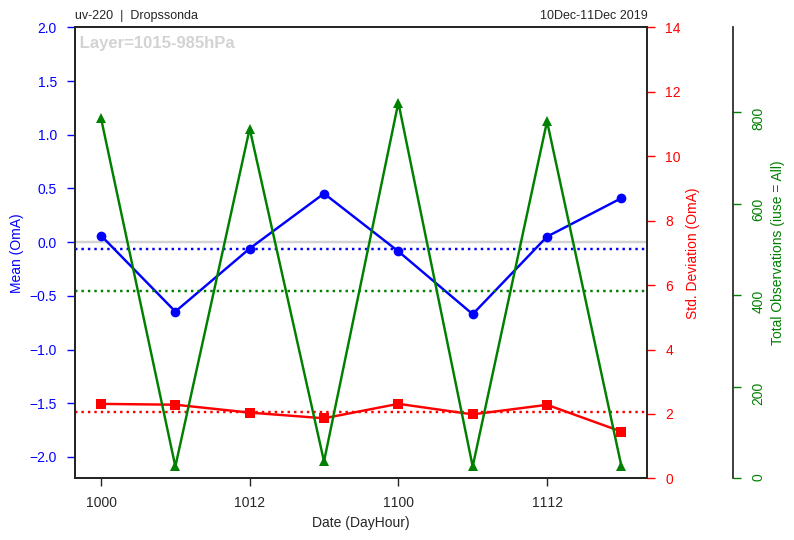

<Figure size 600x400 with 0 Axes>

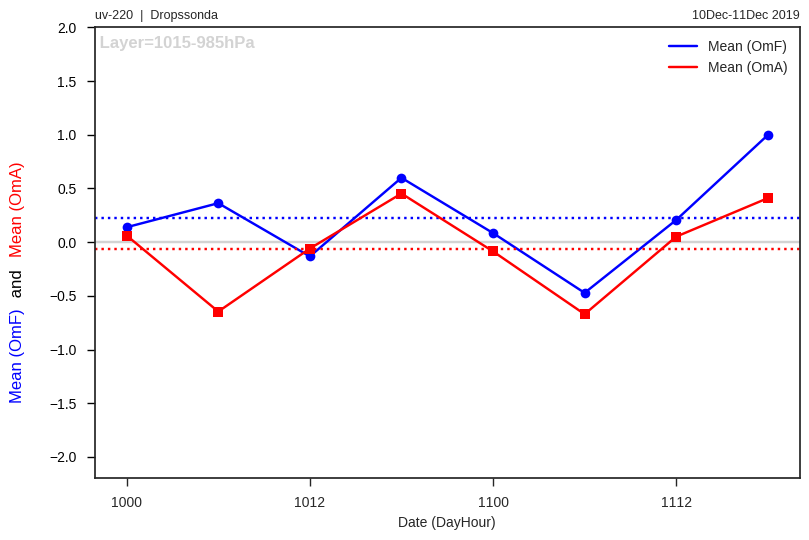

<Figure size 600x400 with 0 Axes>

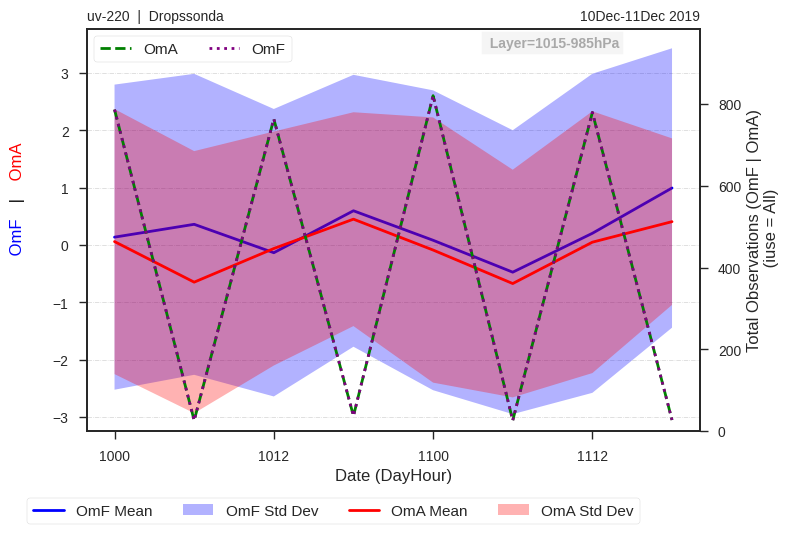

In [22]:
gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

No caso anterior, o parâmetro `Level` estava fixo em 1000 hPa com `SingleL` igual a `All`, ou seja, toda a atmosfera foi considerada como uma única camada e o valor 1000 hPa funciona apenas como uma flag para indicar que não existe variação em altura. Ainda com `Level=1000`, pode-se usar `SingleL='OneL'` para uma única camada em torno do valor de `Level`, neste caso 1000 hPa, variando entre `Level-Lay` e `Level+Lay` (na definição de variáveis, `Lay` foi fixado com 15 hPa; no caso de ser `None`, o valor padrão de 50 hPa é utilizado).


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00  - Level:  1000
 Preparing data for: 2019-12-10:06  - Level:  1000
 Preparing data for: 2019-12-10:12  - Level:  1000
 Preparing data for: 2019-12-10:18  - Level:  1000
 Preparing data for: 2019-12-11:00  - Level:  1000
 Preparing data for: 2019-12-11:06  - Level:  1000
 Preparing data for: 2019-12-11:12  - Level:  1000
 Preparing data for: 2019-12-11:18  - Level:  1000


 Calculating for 2019-12-10:00
 Calculating for 2019-12-10:06
 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

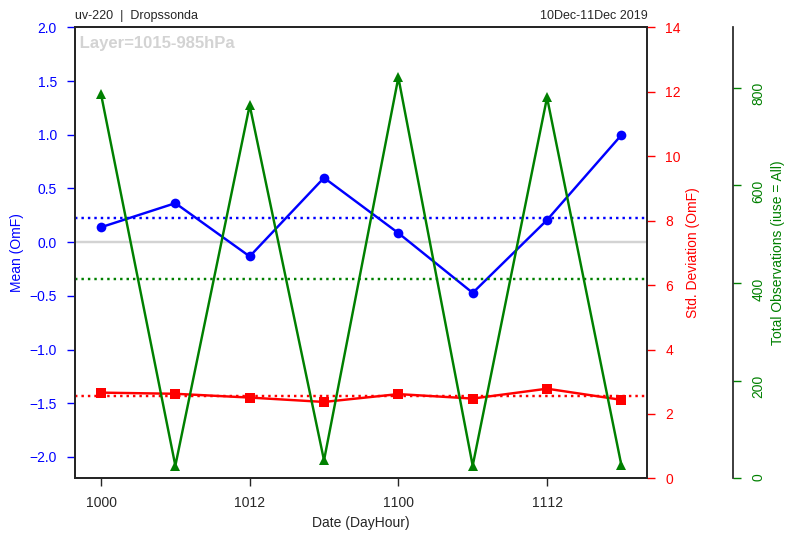

<Figure size 600x400 with 0 Axes>

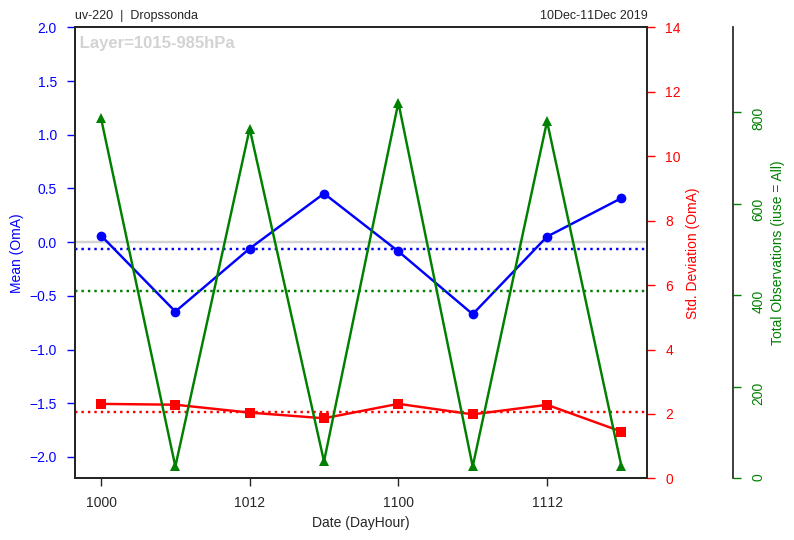

<Figure size 600x400 with 0 Axes>

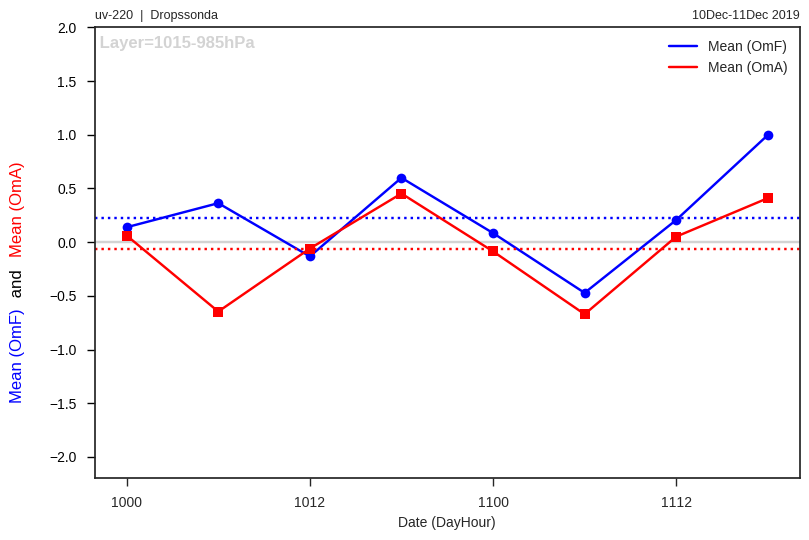

<Figure size 600x400 with 0 Axes>

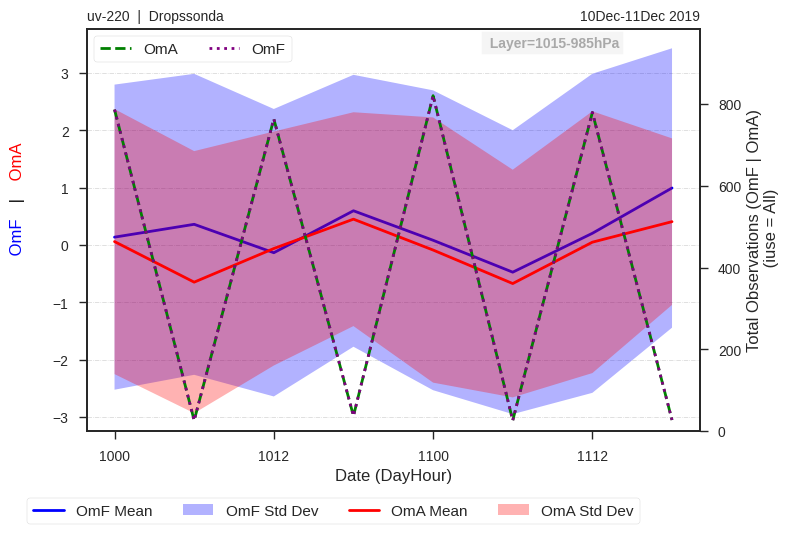

In [23]:
SingleL = 'OneL'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Observe como no exemplo acima a quantidade de dados diminui, uma vez que agora está sendo utilizada uma camada entre 1015 e 985 hPa.

Agora vamos alterar para não fixar em um único nível ou camada, ou seja, altear a variável `Level` para `None` ou `Zlevs`. A opção `None` busca os dados em cada nível existente nos arquivos e faz a figura para todos esses níveis, porém os valores no eixo y (ordenada) são apenas dos níveis padrão. É importante esclarecer que os chamados níveis padrão estão definidos na classe `read_diag` e podem ser acessados utilizando o método `zlevs` da seguinte forma:

In [24]:
gdf_list[tidx].zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

Dessa forma, pode-se utilizar o parâmetro `Level='Zlevs'` para produzir uma série temporal por níveis:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:18
 Levels:  

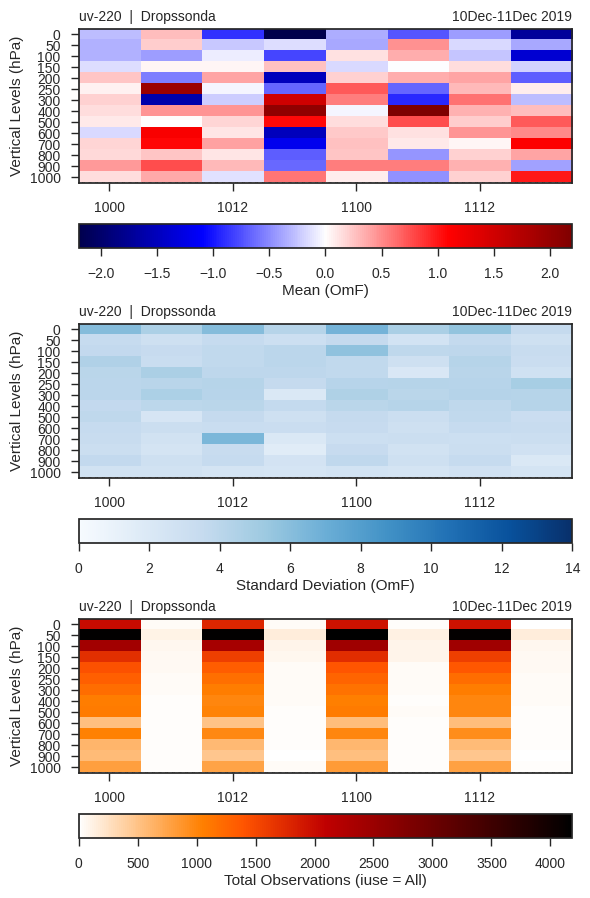

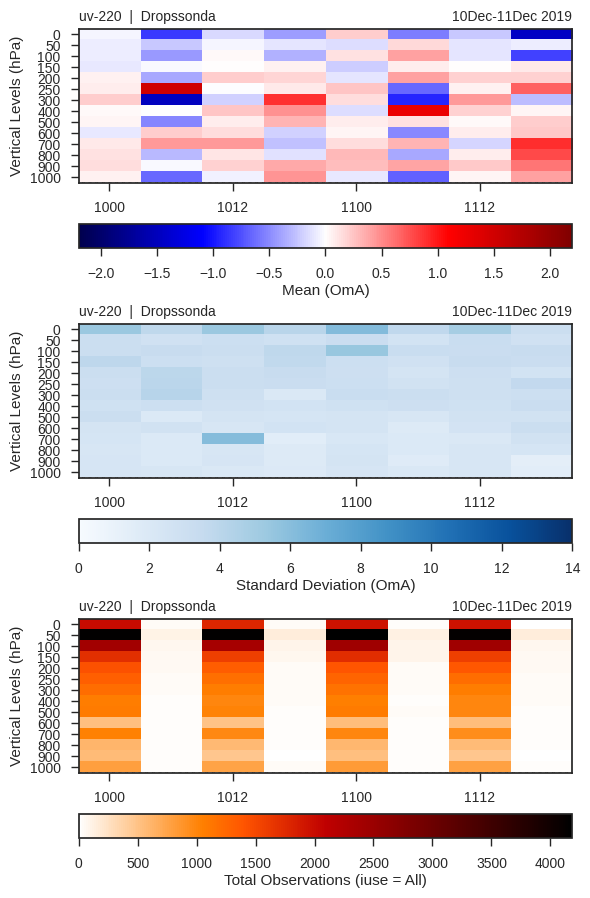

In [25]:
Level = 'Zlevs'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Se `Lay=None`, então as camadas são preenchidas variando entre o valor médio considerando as camadas inferiores e superiores. Por exemplo, para o nível de 700 hPa é construída uma camada entre 750 e 650 hPa, uma vez que os níveis inferiores e superiores são 800 e 600 hPa, respectivamente. Para o nível de 1000 hPa a camada varia entre 1050 e 950 hPa.

O mesmo exemplo anterior, mas considerando `Level='Zlevs'`:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:18
 Levels:  

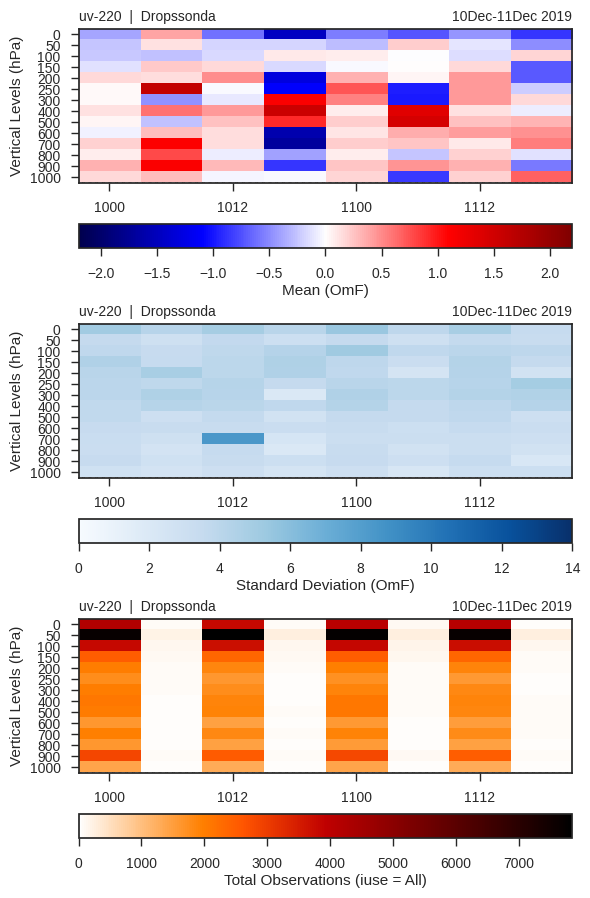

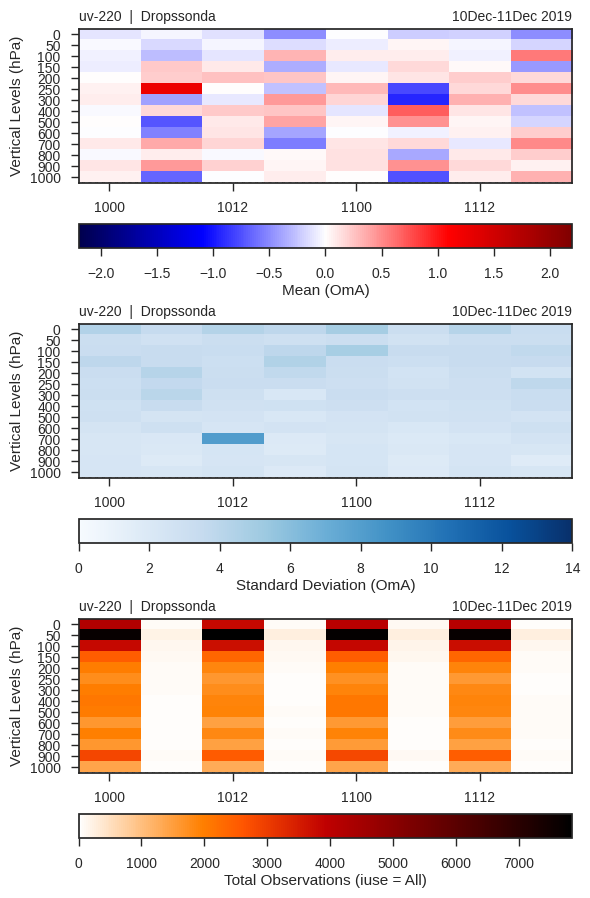

In [26]:
Level = 'Zlevs'
Lay = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finalmente, existe a opção de se considerar todos os níveis, ou seja, `Level=None`. Esta opção traz certa dificuldade na visualização da informação na figura por conta da grande quantidade de níveis e distribuição dos dados em todos os níveis:


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2019-12-10:00
 Levels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

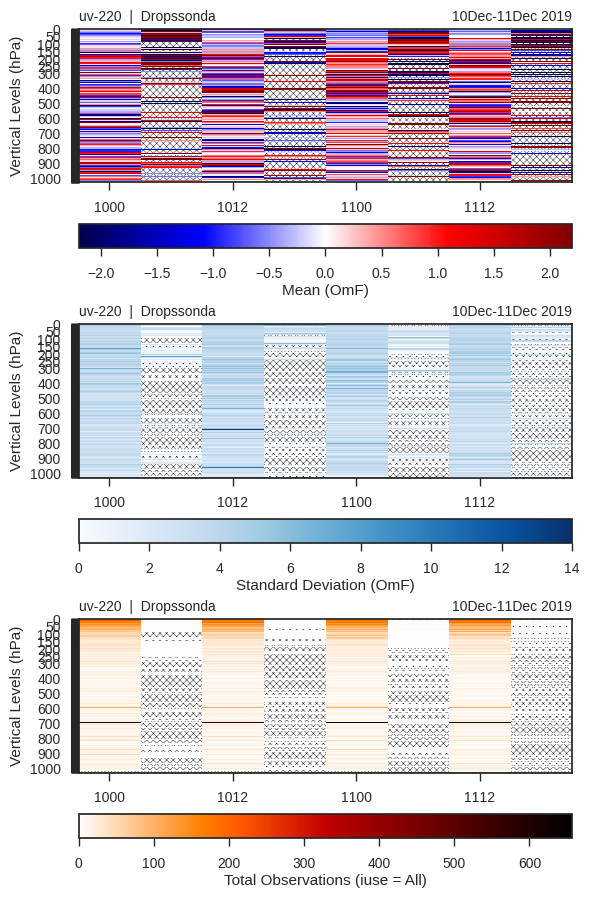

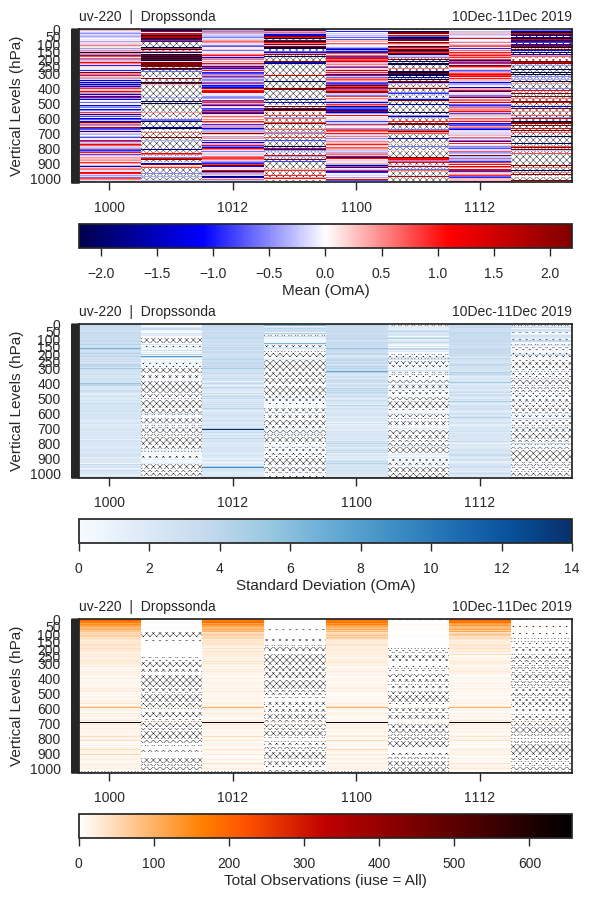

In [27]:
Level = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finalizado o uso dos arquivos, feche-os para liberar a memória utilizada:

In [28]:
for file in gdf_list:
    file.close()

O `readDiag` é um pacote em desenvolvimento e em constante atualização. Novas funcionalidades serão adicionadas e demonstradas por meio deste notebook.